# Classification: K-Nearest Neighbors

## Normalization

Normalizing your data is an essential part of machine learning. You might have an amazing dataset with many great features, but if you forget to normalize, one of those features might completely dominate the others. It’s like you’re throwing away almost all of your information! Normalizing solves this problem. In this article, you learned the following techniques to normalize:

- __Min-max normalization__: Guarantees all features will have the exact same scale but does not handle outliers well.
- __Z-score normalization__: Handles outliers, but does not produce normalized data with the exact same scale.

***

## Training Set vs Validation Set vs Test Set

### Training Set vs Validation Set

The training set is the data that the algorithm will learn from. Learning looks different depending on which algorithm you are using. For example, when using Linear Regression, the points in the training set are used to draw the line of best fit. In K-Nearest Neighbors, the points in the training set are the points that could be the neighbors.

After training using the training set, the points in the validation set are used to compute the accuracy or error of the classifier. The key insight here is that we know the true labels of every point in the validation set, but we’re temporarily going to pretend like we don’t. We can use every point in the validation set as input to our classifier. We’ll then receive a classification for that point. We can now peek at the true label of the validation point and see whether we got it right or not. If we do this for every point in the validation set, we can compute the validation error!

Validation error might not be the only metric we’re interested in. A better way of judging the effectiveness of a machine learning algorithm is to compute its precision, recall, and F1 score

### N-Fold Cross-Validation

Sometimes your dataset is so small, that splitting it 80/20 will still result in a large amount of variance. One solution to this is to perform N-Fold Cross-Validation. The central idea here is that we’re going to do this entire process N times and average the accuracy. For example, in 10-fold cross-validation, we’ll make the validation set the first 10% of the data and calculate accuracy, precision, recall and F1 score. We’ll then make the validation set the second 10% of the data and calculate these statistics again. We can do this process 10 times, and every time the validation set will be a different chunk of the data. If we then average all of the accuracies, we will have a better sense of how our model does on average.

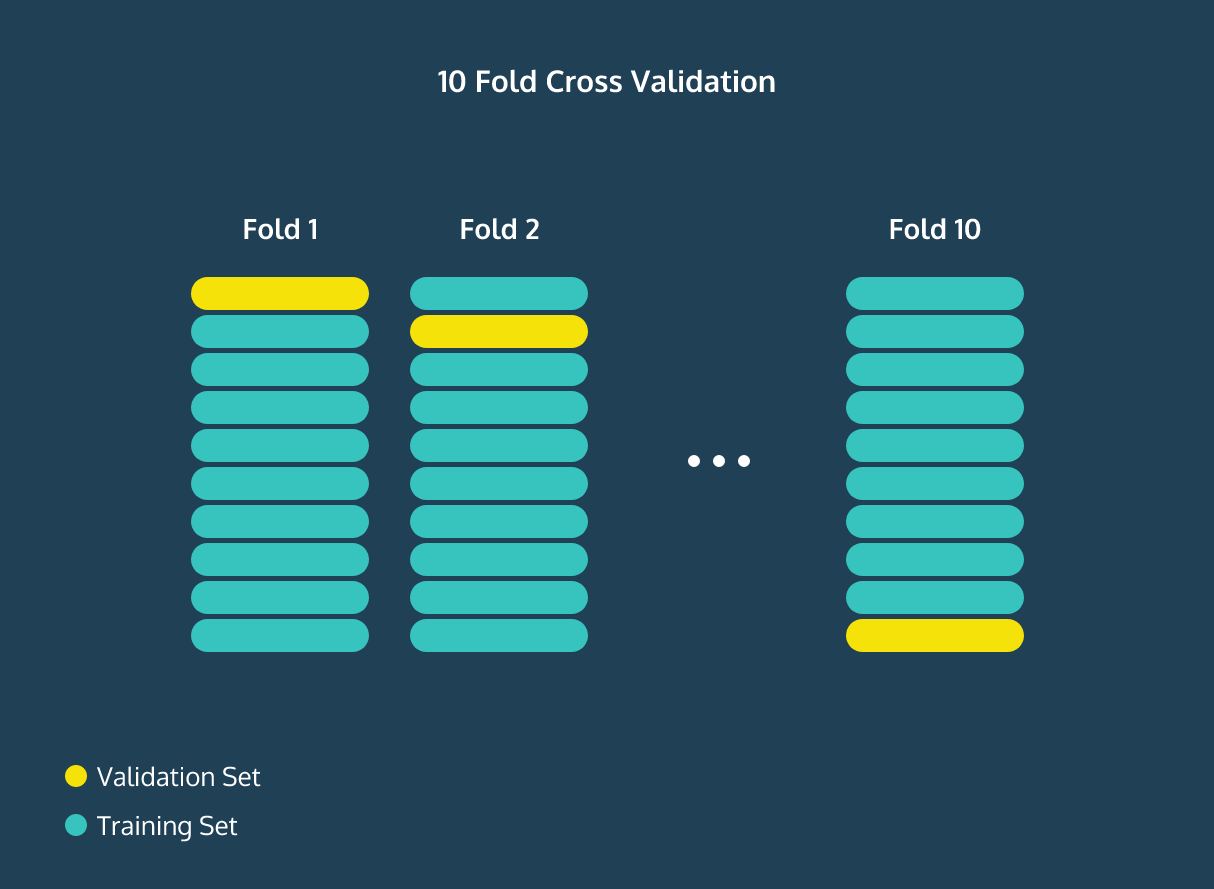



***

#### Distance Between Points - 2D

We need to define what it means for two points to be close together or far apart. To do this, we’re going to use the Distance Formula.

For this example, the data has two dimensions:

- The length of the movie
- The movie’s release date

In [2]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]


def distance(movie1, movie2):
  distance = 0
  for i in range(len(movie1)):
    distance += (movie1[i] - movie2[i])**2

  distance = distance ** 0.5 
  return distance

print(distance(star_wars, raiders))

print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


### Data with Different Scales

#### 1 - Normalization

In [3]:
release_dates = [1897, 1998, 2000, 1948, 1962, 1950, 1975, 1960, 2017, 1937, 1968, 1996, 1944, 1891, 1995, 1948, 2011, 1965, 1891, 1978]

def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []

  for i in lst:
    normalized.append((i - minimum) / (maximum - minimum))
  return normalized


print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


#### 2 - Finding the Nearest Neighbors

In [4]:
def classify(unknown, dataset, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  return neighbors
  
print(classify([.4, .2, .9], movie_dataset, 5))

NameError: name 'movie_dataset' is not defined

#### 3 - Count Neighbors

Classify the new point based on those neighbors.

Our goal now is to count the number of good movies and bad movies in the list of neighbors. If more of the neighbors were good, then the algorithm will classify the unknown movie as good. Otherwise, it will classify it as bad.

In order to find the class of each of the labels, we’ll need to look at our `movie_labels` dataset. For example, `movie_labels['Akira']` would give us 1 because Akira is classified as a good movie.

You may be wondering what happens if there’s a tie. What if `k = 8` and four neighbors were good and four neighbors were bad? There are different strategies, but one way to break the tie would be to choose the class of the closest point.

In [ ]:
def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

print(classify([.4, .2, .9], movie_dataset, movie_labels, 5))

#### 4 - Training and Validation Sets

You’ve now built your first K Nearest Neighbors algorithm capable of classification. You can feed your program a never-before-seen movie and it can predict whether its IMDb rating was above or below 7.0. However, we’re not done yet. We now need to report how effective our algorithm is. After all, it’s possible our predictions are totally wrong!

As with most machine learning algorithms, we have split our data into a training set and validation set.

Once these sets are created, we will want to use every point in the validation set as input to the K Nearest Neighbor algorithm. We will take a movie from the validation set, compare it to all the movies in the training set, find the K Nearest Neighbors, and make a prediction. After making that prediction, we can then peek at the real answer (found in the validation labels) to see if our classifier got the answer correct.

If we do this for every movie in the validation set, we can count the number of times the classifier got the answer right and the number of times it got it wrong. Using those two numbers, we can compute the validation accuracy.

Validation accuracy will change depending on what K we use. In the next exercise, we’ll use the validation accuracy to pick the best possible K for our classifier.

#### 5 - Choosing K

The validation accuracy changes as k changes. The first situation that will be useful to consider is when k is very small. Let’s say k = 1. We would expect the validation accuracy to be fairly low due to overfitting. Overfitting is a concept that will appear almost any time you are writing a machine learning algorithm. Overfitting occurs when you rely too heavily on your training data; you assume that data in the real world will always behave exactly like your training data. In the case of K-Nearest Neighbors, overfitting happens when you don’t consider enough neighbors. A single outlier could drastically determine the label of an unknown point. Consider the image below.

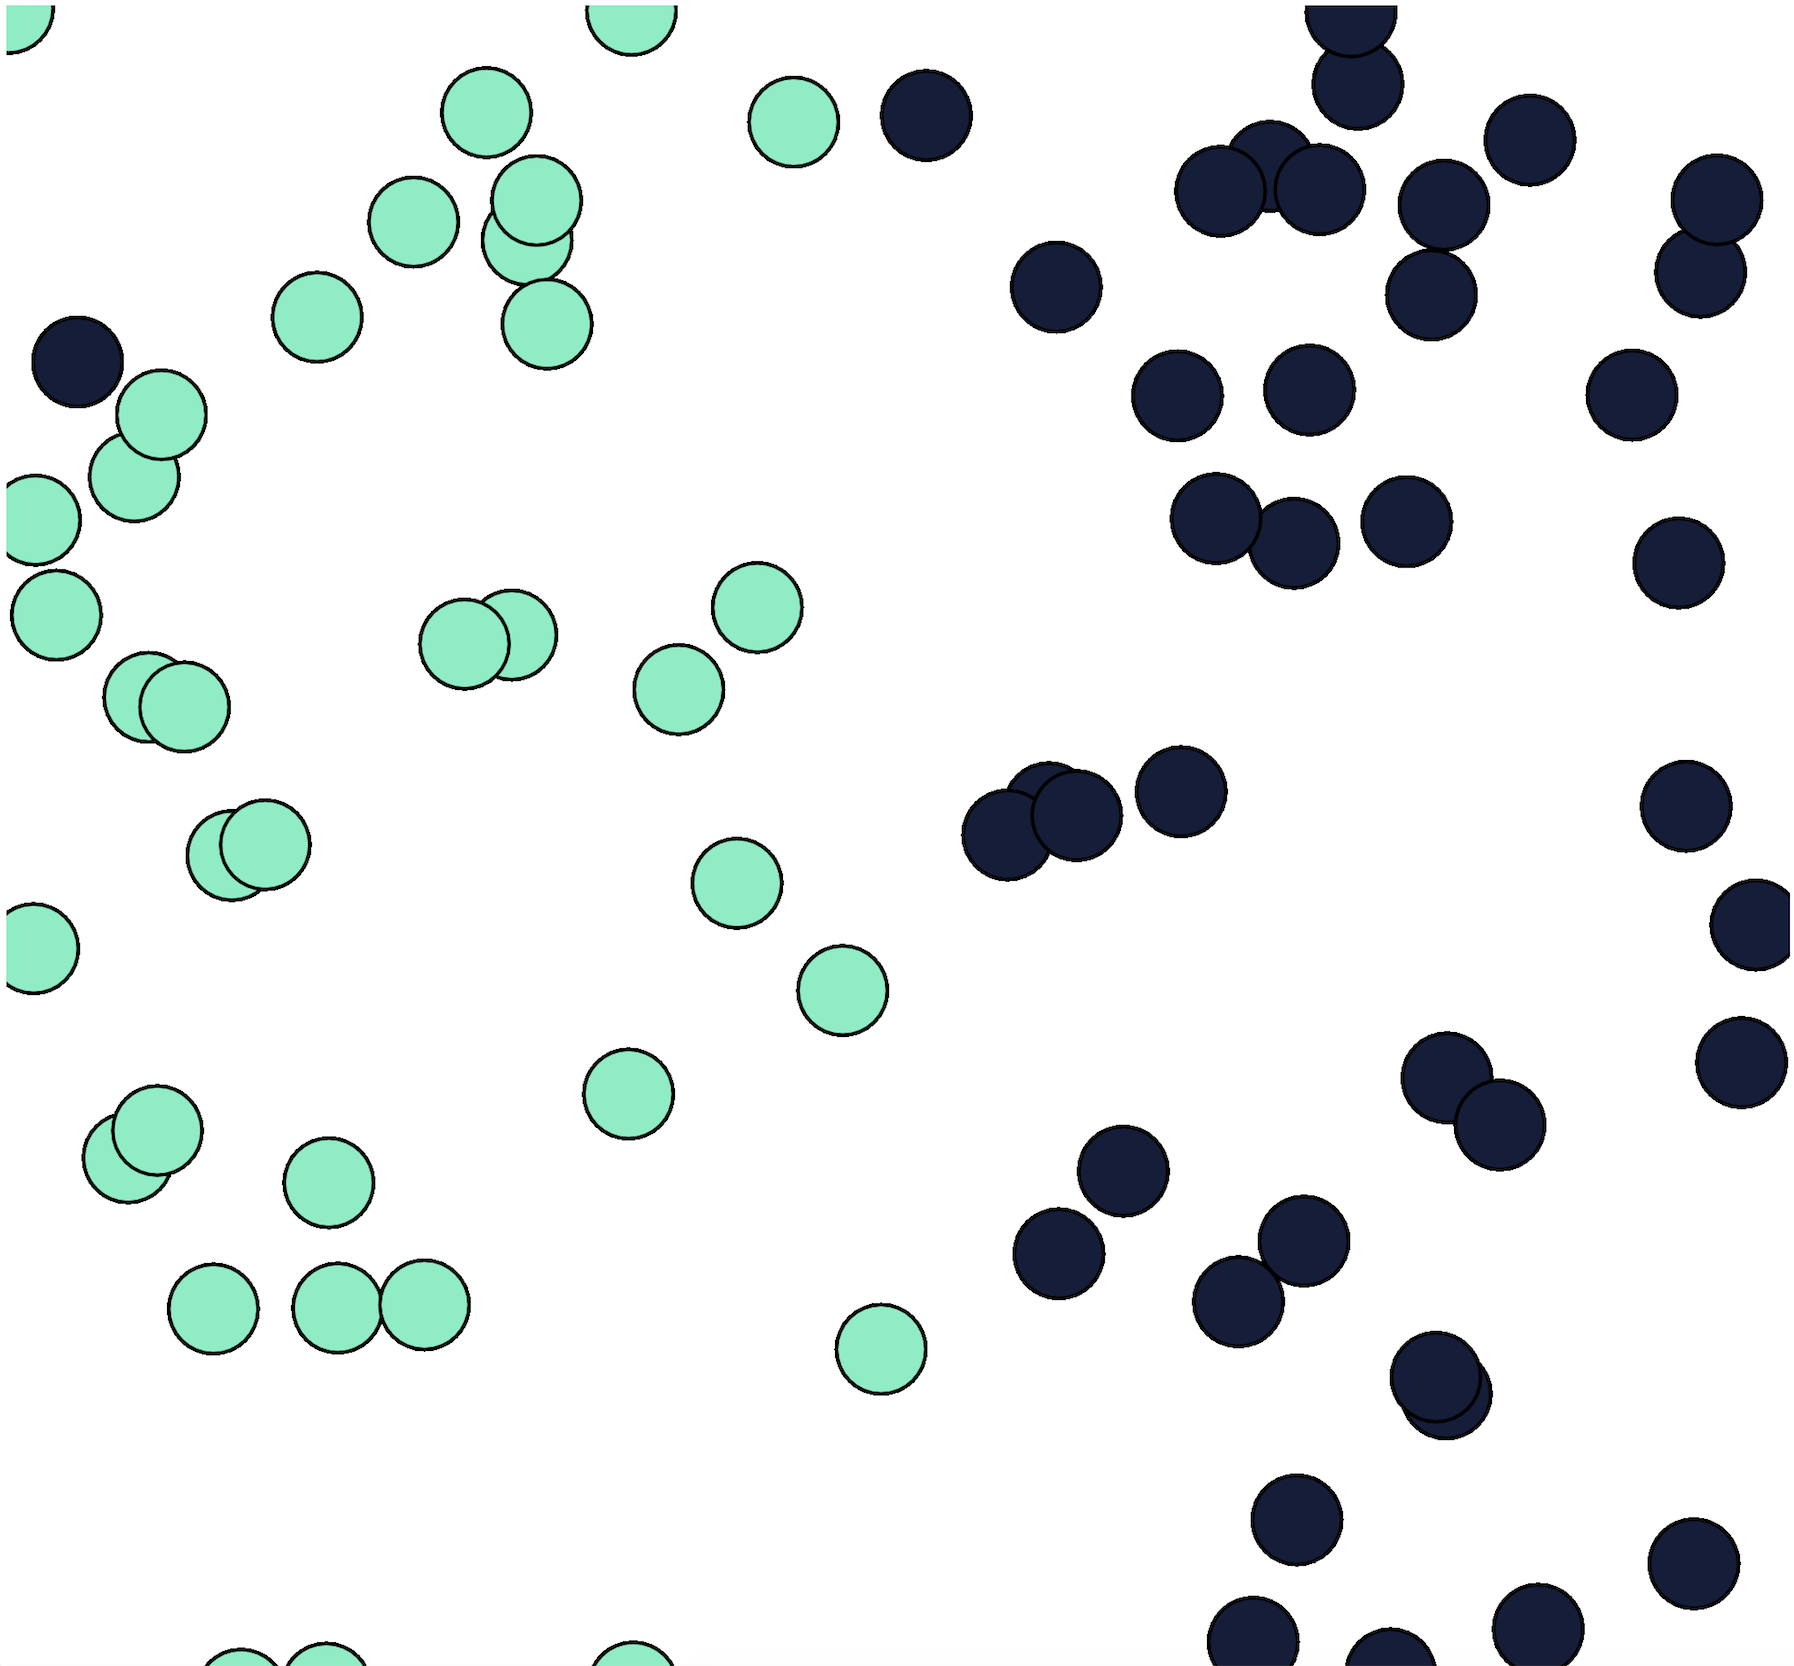

The dark blue point in the top left corner of the graph looks like a fairly significant outlier. When k = 1, all points in that general area will be classified as dark blue when it should probably be classified as green. Our classifier has relied too heavily on the small quirks in the training data.

On the other hand, if k is very large, our classifier will suffer from underfitting. Underfitting occurs when your classifier doesn’t pay enough attention to the small quirks in the training set. Imagine you have 100 points in your training set and you set k = 100. Every single unknown point will be classified in the same exact way. The distances between the points don’t matter at all! This is an extreme example, however, it demonstrates how the classifier can lose understanding of the training data if k is too big.



In [ ]:
def find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, k):
  num_correct = 0.0
  for movie in validation_set:
  
    guess = classify(validation_set[movie], training_set, training_labels, k)
    if guess == validation_labels[movie]:
      num_correct += 1
  
  return num_correct / len(validation_set)

#### Using sklearn

There are a couple of steps we’ll need to go through in order to use the library. First, you need to create a `KNeighborsClassifier` object. This object takes one parameter - `k`. For example, the code below will create a classifier where `k = 3`

In [ ]:
from movies import movie_dataset, labels
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

Next, we’ll need to train our classifier. The .fit() method takes two parameters. The first is a list of points, and the second is the labels associated with those points. So for our movie example, we might have something like this

In [5]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
 
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

NameError: name 'classifier' is not defined

Finally, after training the model, we can classify new points. The .predict() method takes a list of points that you want to classify. It returns a list of its guesses for those points.

In [6]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
 
guesses = classifier.predict(unknown_points)

NameError: name 'classifier' is not defined

### Project

0.9473684210526315


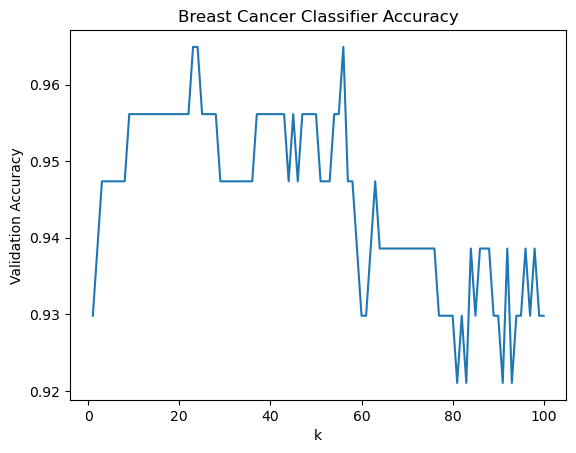

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

breast_cancer_data = load_breast_cancer()

# print(breast_cancer_data.feature_names)

#print(breast_cancer_data.target)
#print(breast_cancer_data.target_names)

# Splitting the data into Training and Validation Sets
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

# print(len(training_data))
# print(len(training_labels))

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(training_data, training_labels)

print(classifier.score(validation_data, validation_labels))
k_list = []
accuracies = []
for k in range(1, 101):
  k_list.append(k)

  classifier = KNeighborsClassifier(n_neighbors = k)

  classifier.fit(training_data, training_labels)

  accuracies.append(classifier.score(validation_data, validation_labels))

plt.title("Breast Cancer Classifier Accuracy")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.plot(k_list, accuracies)
plt.show()


### Review

- Data with `n` features can be conceptualized as points lying in n-dimensional space.
- Data points can be compared by using the distance formula. Data points that are similar will have a smaller distance between them.
- A point with an unknown class can be classified by finding the k nearest neighbors
- To verify the effectiveness of a classifier, data with known classes can be split into a training set and a validation set. Validation error can then be calculated.
- Classifiers have parameters that can be tuned to increase their effectiveness. In the case of K-Nearest Neighbors, `k` can be changed.
- A classifier can be trained improperly and suffer from overfitting or underfitting. In the case of K-Nearest Neighbors, a low `k` often leads to overfitting and a large `k` often leads to underfitting.
- Python’s sklearn library can be used for many classification and machine learning algorithms.
